# Behavioural analysis

## Preparing the data

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

Loading the data:

In [28]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcEcc_ct-tXbv23'
## As the first step, gathering 2 & 3 second duration files:
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
ds = pd.DataFrame()
## t2
expName = 'mcEcc_ct-tXbv2'
allSubjDirs2 = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs2
for subjDir in allSubjDirs2:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
## t3
expName = 'mcEcc_ct-tXbv3'
allSubjDirs3 = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs3
for subjDir in allSubjDirs3:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
#print ds.head(5)
print ds.shape

/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-tXbv23/mcEcc_ct-tXbv2_p0_s1_2016-11-21_1603
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-tXbv23/mcEcc_ct-tXbv2_p1_s1_2016-11-25_1622
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-tXbv23/mcEcc_ct-tXbv2_p3_s1_2016-11-21_1501
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-tXbv23/mcEcc_ct-tXbv3_p0_s1_2016-11-21_1606
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-tXbv23/mcEcc_ct-tXbv3_p1_s1_2016-11-25_1627
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-tXbv23/mcEcc_ct-tXbv3_p3_s1_2016-11-21_1504
(178, 41)


In [29]:
# Taking only this many trials from the 1s condition:
trialMax = np.max(ds.trialN)

# Secondly, getting the 1s duration files for the represented subjects:
uniquePts = np.sort(ds['participant'].unique())
expName = 'mcEcc_ct-bv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs1 = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs1
for subjDir in allSubjDirs1:
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    thisDs = pd.read_csv(subjFilePath)
    if thisDs['participant'].unique() in uniquePts:
        print subjDir
        ds = ds.append(thisDs[thisDs.trialN<=trialMax])
print ds.shape
print ds.columns
# print ds['participant'].unique() # should be confined to represented Pts

/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p0_s1_2016-11-14_1456
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p0_s2_2016-11-15_1327
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p0_s3_2016-11-15_1338
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p1_s1_2016-11-15_1615
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p1_s2_2016-11-15_1623
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p1_s3_2016-11-15_1636
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p3_s1_2016-11-18_1444
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p3_s2_2016-11-18_1454
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p3_s3_2016-11-18_1503
(466, 41)
Index([u'BsfL', u'BsfR', u'BvL', u'BvR', u'colorL', u'colorR', u'dirL',
       u'dirR', u'expName', u'fovFade', u'fovGap', u'nFrames', u'nNa',
       u'nf000', u'nf090', u'nf180', u'nf270', u'offX', u'offY',
       u'participant', u'pd000', u'

Transforming the data set first.

In [30]:
ds['stimSz'] = np.round((ds.periGap*2+32)/35,1)
ds['ringSzDeg'] = np.round((ds.ringSz+32)/35,1)
ds['ringSzP'] = np.round(ds.ringSzDeg/ds.stimSz,2)
ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
print ds.head(5)

   BsfL  BsfR   BvL   BvR     colorL     colorR  dirL  dirR         expName  \
0  0.05  0.05  9.60  0.01  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-tXbv2   
1  0.05  0.05  9.60  0.01  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-tXbv2   
2  0.05  0.05  0.01  9.60  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-tXbv2   
3  0.05  0.05  0.01  9.60  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-tXbv2   
4  0.05  0.05  9.60  0.01  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-tXbv2   

   fovFade   ...     tfL  tfR             time  trialN  trialT  vL  vR  \
0        2   ...     NaN  NaN  2016-11-21_1603       1       2   0   0   
1        2   ...     NaN  NaN  2016-11-21_1603       2       2   0   0   
2        2   ...     NaN  NaN  2016-11-21_1603       3       2   0   0   
3        2   ...     NaN  NaN  2016-11-21_1603       4       2   0   0   
4        2   ...     NaN  NaN  2016-11-21_1603       5       2   0   0   

   stimSz  ringSzDeg  ringSzP  
0     6.4        6.4     1.00  
1     6.4       

## Visualization

In [31]:
summary = ds.groupby(['participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Slow (down):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf180'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Fast (left):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf090'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Patchy/transparent (up):'
print summary

Slow (down):
   participant  sum      mean       std  size
0            0   13  0.081250  0.274076   160
1            1   64  0.415584  0.494430   154
2            3   48  0.315789  0.466366   152
Fast (left):
   participant  sum      mean       std  size
0            0   67  0.418750  0.494903   160
1            1   52  0.337662  0.474456   154
2            3   58  0.381579  0.487380   152
Patchy/transparent (up):
   participant  sum      mean       std  size
0            0   80  0.500000  0.501570   160
1            1   38  0.246753  0.432528   154
2            3   46  0.302632  0.460916   152


In [32]:
ssRing = ds[ds.ringSzP < 1]

### Proportion slow/fast/patchy trials

(-0.1, 1.1)

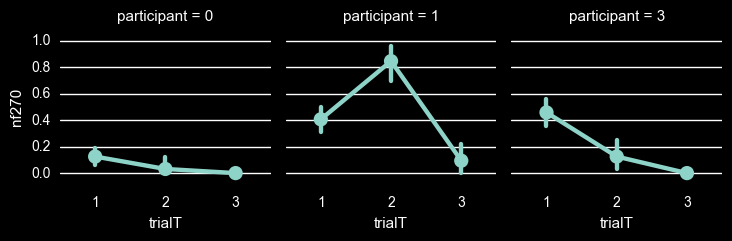

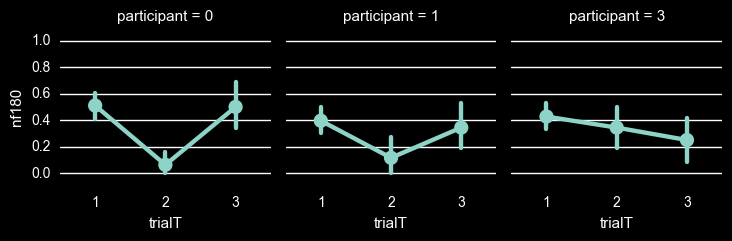

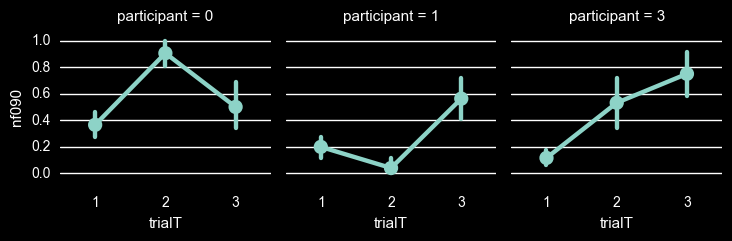

In [33]:
g = sns.factorplot(x='trialT', y='nf270', col='participant', col_wrap=3,
                   data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='trialT', y='nf180', col='participant', col_wrap=3,
                   data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='trialT', y='nf090', col='participant', col_wrap=3,
                   data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)

### Stimulus size for slow/fast/patchy trials

(-0.1, 1.1)

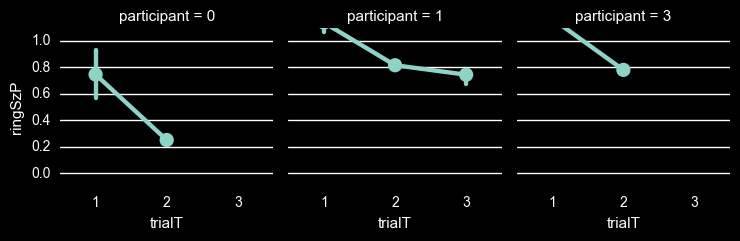

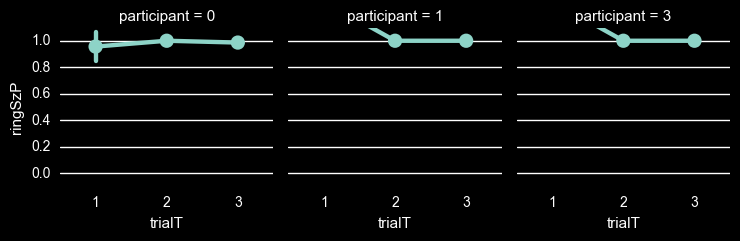

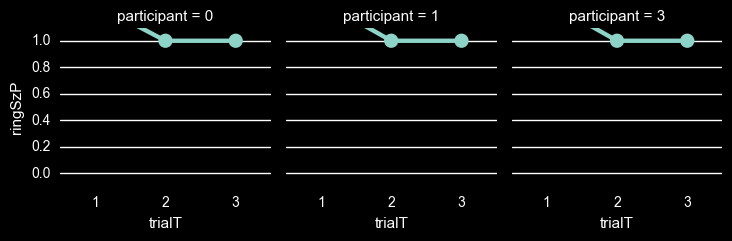

In [34]:
g = sns.factorplot(x='trialT', y='ringSzP', col='participant', col_wrap=3,
                   data=ds[ds.nf270==1], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='trialT', y='ringSzP', col='participant', col_wrap=3,
                   data=ds[ds.nf180==1], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='trialT', y='ringSzP', col='participant', col_wrap=3,
                   data=ds[ds.nf090==1], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)